# The Sparks Foundation - GRIP
## Data Science & Business Analytics

# Task - 1   Prediction using Supervised ML
## Predict the percentage of an student based on the no. of study hours.

### Created by: Jay Khade

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Data Reading & Understanding

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

**So, here we have 25 observations with one feature and one target.**

In [4]:
# checking for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# checking for duplicated entries
df.duplicated().sum()

0

**No duplicate entry found.**

In [6]:
# checking for stastical summary
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**After observing mean and median values we can say that data is not skewed.**

# EDA

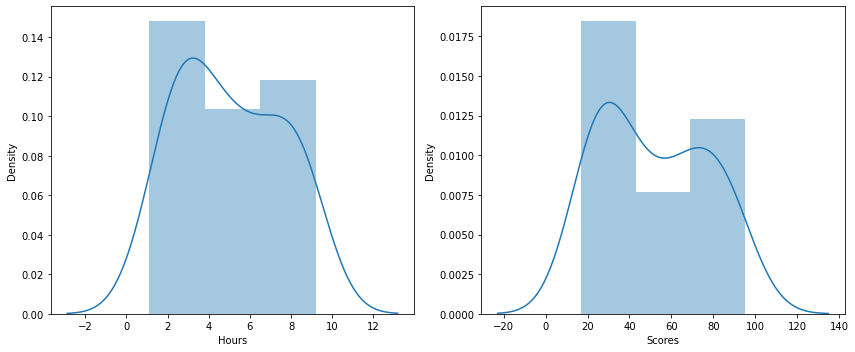

In [7]:
# univariate analysis

plt.figure(figsize=(12,5))
for i in enumerate(df.columns):
    plt.subplot(1,2,i[0]+1)
    sns.distplot(df[i[1]])
plt.tight_layout()    
plt.show()

**we can observe that, Hours and Scores are approximately normally distributed. Data is not skewed.**

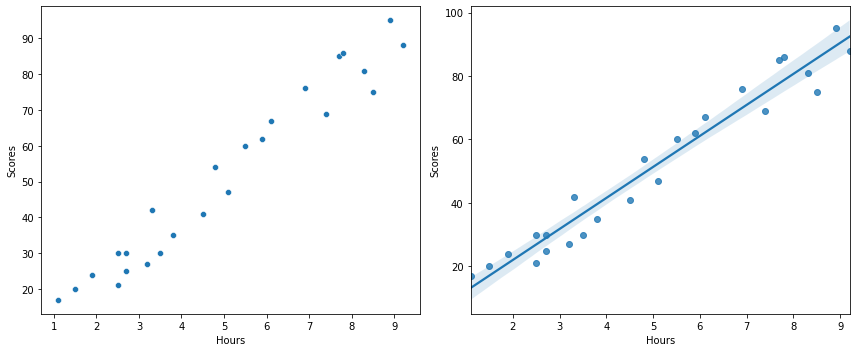

In [8]:
# bivariate analysis

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x="Hours", y="Scores")

plt.subplot(1,2,2)
sns.regplot(data=df, x="Hours", y="Scores")

plt.tight_layout()
plt.show()

**We can observe positive trend here. As Number of study hour increases, Scores are also increasing.** 
**Linear Regression is a good option to try out in above scenario.**

# Missing Values

In [9]:
# checking for missing values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**we dont have any missing values.**

In [10]:
X_train = df.drop(["Scores"],axis=1)
y_train = df["Scores"]

# Model Building - Linear Regression

In [11]:
# using statsmodel

# adding constant

X_train_sm = sm.add_constant(X_train)

# fitting linear regression model

lr = sm.OLS(y_train,X_train_sm).fit()

In [12]:
# checking parameters
lr.params

const    2.483673
Hours    9.775803
dtype: float64

In [13]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           9.13e-17
Time:                        12:48:23   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

**Interpretation:**
- **If we increase hours by one unit then, there will 9.77 units increment in Scores.** 

- **The coefficient for Hours is 9.7758 , with a very low p value. The coefficient is statistically significant. So the association is not purely by chance.**

- **R-square is 0.953.**

- **F statistic has a very low p value.Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.**

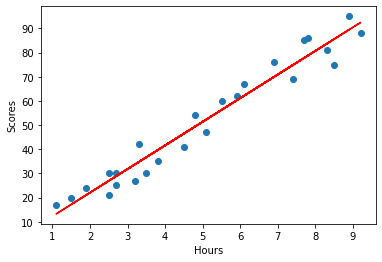

In [14]:
# visualizing linear regression fit

plt.scatter(X_train, y_train)
plt.plot(X_train, 2.4837 + 9.7758*X_train, 'r')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()